# 🪪 ID Card Detection using Classical Computer Vision

This notebook implements an ID-card-like object detection algorithm using **OpenCV** and **classical image processing** techniques.

The detector identifies rectangular card-shaped objects in images using:
- Edge detection (Canny)
- Contour extraction
- Polygon approximation (4 corners)
- Area and aspect ratio filtering




# 📦 Import Required Libraries

We begin by importing all the necessary Python libraries:
- `OpenCV` for image processing  
- `NumPy` for numerical operations  
- `Matplotlib` for image visualization  


In [1]:

import cv2
import numpy as np
from matplotlib import pyplot as plt


# 🧠 ID Card Detection Function

The function **`detect_multiple_id_cards()`** performs the following steps:

### 🔍 Detection Pipeline
1. **Load Image**  
2. **Preprocessing**
   - Convert to grayscale  
   - Gaussian blur  
3. **Edge Detection**
   - Canny  
   - Edge dilation  
4. **Contour Extraction**
   - `findContours()`  
   - `approxPolyDP()`  
5. **Filtering Logic**
   - Quadrilaterals  
   - Area range  
   - Aspect ratio  
   - Nested contour removal  
6. **Result Rendering**
   - Draw boundaries  
   - Label detected cards  
   - Show output images  



In [4]:

def detect_multiple_id_cards(image_path, show=False):
    img = cv2.imread(image_path)
    orig = img.copy()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    edges = cv2.Canny(gray, 70, 200)
    kernel = np.ones((4, 4), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)

    cnts, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    card_contours = []
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.03 * peri, True)
        area = cv2.contourArea(c)

        if len(approx) == 4 and 5000 < area < 300000:
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h

            if 0.5 < aspect_ratio < 2.5:
                card_contours.append({
                    'contour': approx,
                    'area': area,
                    'bbox': (x, y, w, h)
                })

    card_contours.sort(key=lambda x: x['area'], reverse=True)

    filtered_contours = []
    for i, card1 in enumerate(card_contours):
        is_nested = False
        x1, y1, w1, h1 = card1['bbox']

        for j, card2 in enumerate(card_contours):
            if i != j and card2['area'] > card1['area']:
                x2, y2, w2, h2 = card2['bbox']

                if (x1 > x2 and y1 > y2 and 
                    x1 + w1 < x2 + w2 and y1 + h1 < y2 + h2):
                    is_nested = True
                    break

        if not is_nested:
            filtered_contours.append(card1)

    card_contours = filtered_contours

    if len(card_contours) == 0:
        print("No ID cards detected!")
        return None, []

    colors = [
        (0, 255, 0), (255, 0, 0), (0, 0, 255),
        (255, 255, 0), (255, 0, 255), (0, 255, 255)
    ]

    for idx, card in enumerate(card_contours):
        color = colors[idx % len(colors)]
        cv2.drawContours(orig, [card['contour']], -1, color, 4)

        M = cv2.moments(card['contour'])
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(orig, f"Card {idx + 1}", (cX - 40, cY), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    print(f"Detected {len(card_contours)} ID card(s)")

    if show:
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"Detected {len(card_contours)} ID Card(s)")
        plt.show()

    return orig, [card['contour'] for card in card_contours]


# 🖼️ Running Detection on Sample Images

Below, we test the detection function on multiple images.

For each image:
- The detector identifies all potential ID-card-like regions  
- Displays the result  
- Saves the processed output as:
    multiple_cards_detected_1.jpg
    multiple_cards_detected_2.jpg
    ...


Make sure the sample images exist in the same folder or update paths as needed.


Detected 1 ID card(s)


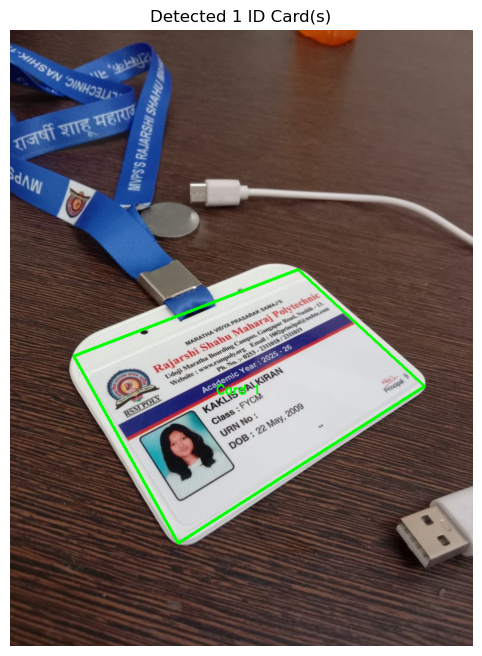

Saved: multiple_cards_detected_1.jpg | Detected 1 card(s)
Detected 1 ID card(s)


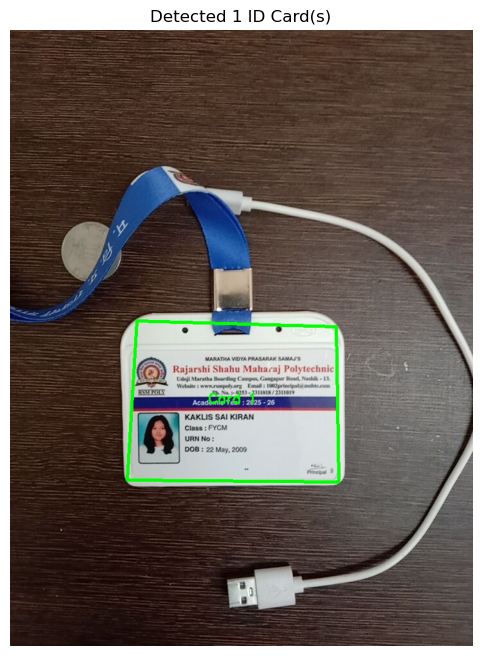

Saved: multiple_cards_detected_2.jpg | Detected 1 card(s)
Detected 1 ID card(s)


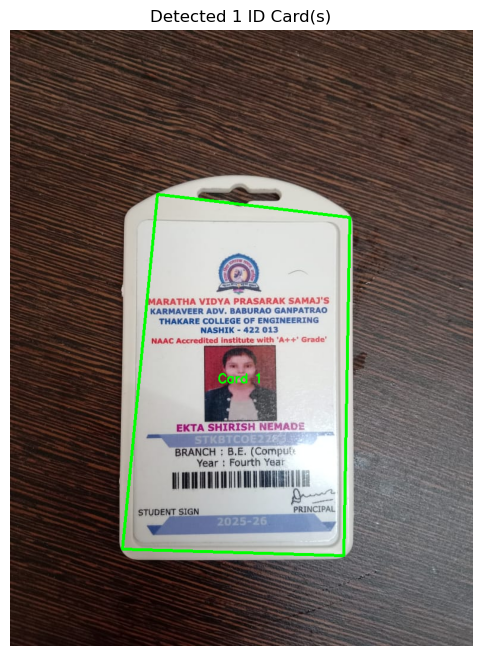

Saved: multiple_cards_detected_3.jpg | Detected 1 card(s)
Detected 2 ID card(s)


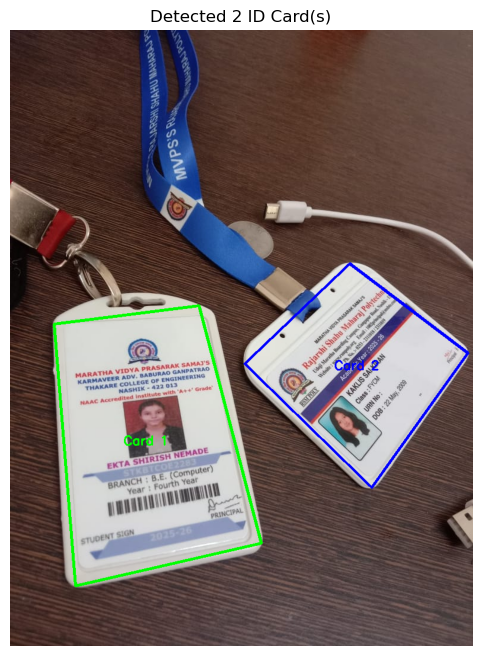

Saved: multiple_cards_detected_4.jpg | Detected 2 card(s)
Detected 2 ID card(s)


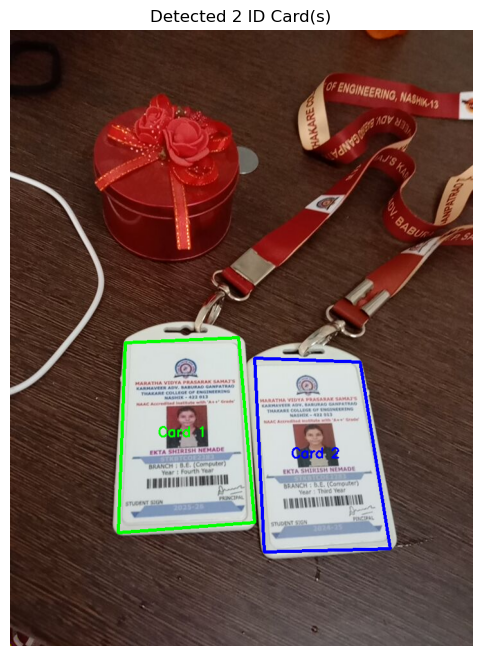

Saved: multiple_cards_detected_5.jpg | Detected 2 card(s)
Detected 2 ID card(s)


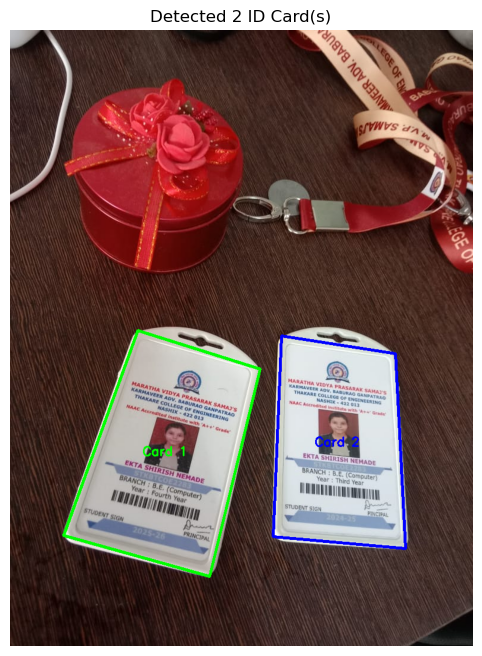

Saved: multiple_cards_detected_6.jpg | Detected 2 card(s)
Detected 3 ID card(s)


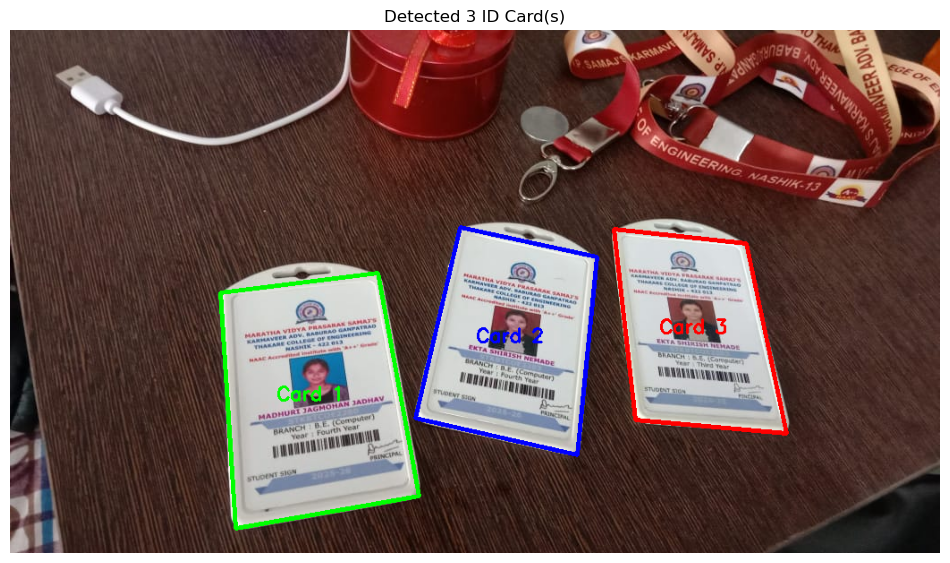

Saved: multiple_cards_detected_7.jpg | Detected 3 card(s)


In [3]:

sample_images = [
    "sample2.jpg",
    "sample1.jpg",
    "sample.jpg",
    "sample4.jpg",
    "sample5.jpg",
    "sample6.jpg",
    "sample7.jpg"
]

for i, img_name in enumerate(sample_images, start=1):
    output, contours = detect_multiple_id_cards(img_name, show=True)
    if output is not None:
        out_name = f"multiple_cards_detected_{i}.jpg"
        cv2.imwrite(out_name, output)
        print(f"Saved: {out_name} | Detected {len(contours)} card(s)")
    else:
        print(f"Skipped {img_name} (image not found or unreadable)")


# 📊 Output Summary

For every processed image, the script prints:

- Number of ID cards detected  
- Saved output image name  


